In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

Blank Image


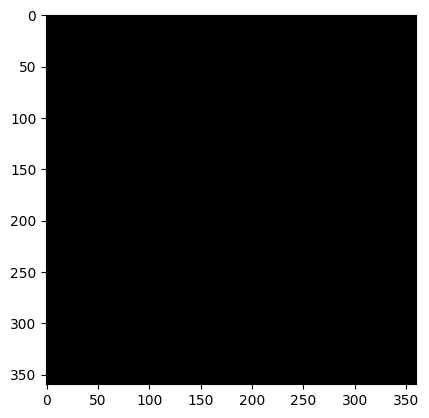

In [2]:
IMG_DIMS = (360,360)
CENTER = (IMG_DIMS[0]//2, IMG_DIMS[1]//2)
RADIUS = 160

WHITE = (255, 255, 255)

image = np.zeros(IMG_DIMS, dtype=np.uint8)

print("Blank Image")
plt.imshow(image, cmap='gray')

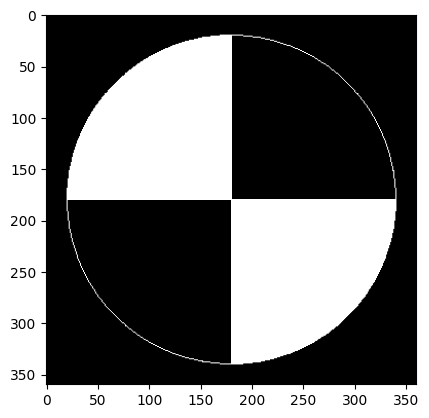

In [3]:
# Draw Quadrants.
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=0, endAngle=90, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=90, endAngle=180, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=180, endAngle=270, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=270, endAngle=360, color=WHITE)


# Draw lines to seperate quadrants.
image = cv2.line(image, (IMG_DIMS[0]//2 - 160, IMG_DIMS[1]//2), (IMG_DIMS[0]//2 + 160, IMG_DIMS[1]//2), color=WHITE)
image = cv2.line(image, (IMG_DIMS[0]//2, IMG_DIMS[1]//2 - RADIUS), (IMG_DIMS[0]//2, IMG_DIMS[1]//2 + RADIUS), color=WHITE)

# Fill in colors.
cv2.floodFill(image, None, (IMG_DIMS[0]//2 - 80, IMG_DIMS[1]//2 - RADIUS//2), 255)
cv2.floodFill(image, None, (IMG_DIMS[0]//2 + 80, IMG_DIMS[1]//2 + RADIUS//2), 255)
plt.imshow(image, cmap='gray')

original_image = image

Original image variances for all 3 x 3 regions

Region with focal radius : 10




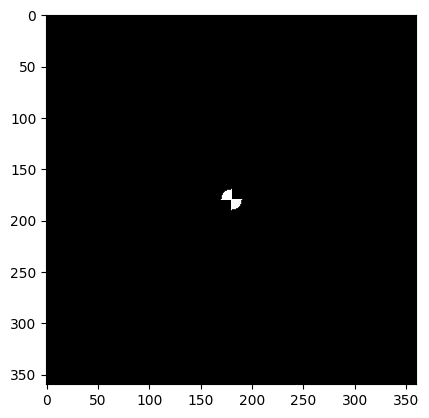

image with focal point at center initially


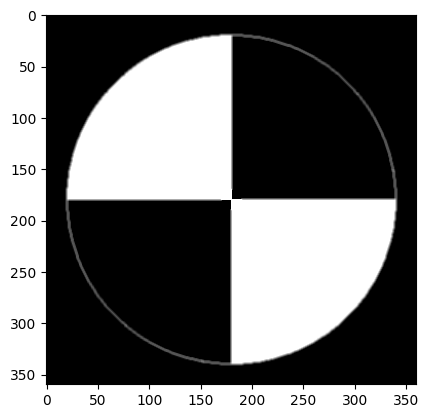

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

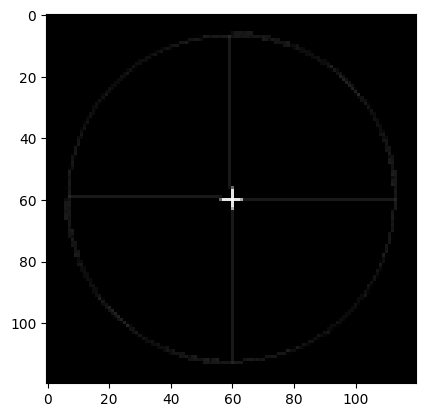

In [4]:
blurred_image = cv2.GaussianBlur(image, (3, 3), 10)
fr = 10
mask = np.zeros(IMG_DIMS, dtype=np.uint8)
non_blurred_region = cv2.circle(mask, CENTER, 10, (255, 255, 255), -1)
non_blurred_region = cv2.bitwise_and(non_blurred_region, image)
print('Region with focal radius : ' + str(fr) + '\n\n')
plt.imshow(non_blurred_region, cmap='gray')
plt.show()

blurred_image_copy = blurred_image.copy()
blurred_image_copy = cv2.circle(blurred_image_copy, CENTER, 10, (0, 0, 0), -1)
image = blurred_image_copy +  non_blurred_region

print('image with focal point at center initially')
plt.imshow(image, cmap='gray')
plt.show()

laplacian_filter_8 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
edge_mask = cv2.filter2D(image, -1, laplacian_filter_8)

variances = []
for x in range(0, IMG_DIMS[0]//3):
    for y in range(0, IMG_DIMS[1]//3):
        i = x * 3
        j = y * 3
        variances.append(np.var([edge_mask[i+0,j+0], edge_mask[i+0,j+1],edge_mask[i+0,j+2],edge_mask[i+1,j+0],edge_mask[i+1,j+1],
        edge_mask[i+1,j+2]
        ,edge_mask[i+2,j+0],edge_mask[i+2,j+1],edge_mask[i+2,j+2]]))

for i in range(0, IMG_DIMS[0]//3):
    for j in range(0, IMG_DIMS[1]//3):
        print(variances[i * IMG_DIMS[0]//3 + j], end=' ')
    print('\n')

variance_image = np.array(variances).reshape(IMG_DIMS[0]//3, IMG_DIMS[1]//3)
plt.imshow(abs(variance_image), cmap='gray')

Logic # 1 -> Brute force
Locate all regions in some neighbourhood of 3x3 where the variance varies is extremely high, and then merge these together. For now, there will only be a single such region (if they are multiple, choose the region with highest such effect). Then, find the distance between the two farthest pixels (taking n8 connectivity).
This distance will be th e

Region with focal radius : 10




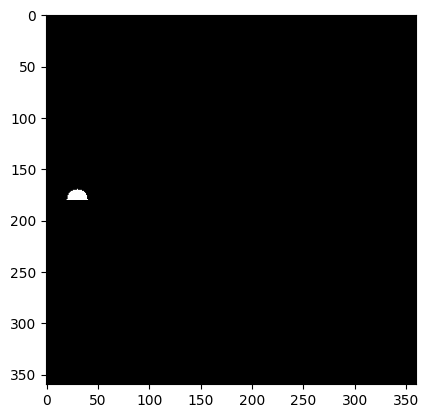

Test image with radius  10  being sharp with rest as blurred


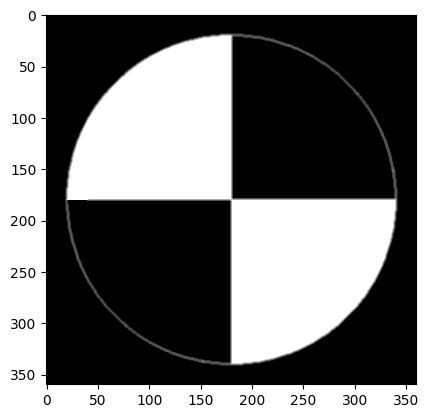

difference in test image and filtered non blurred region (in circular fasion)


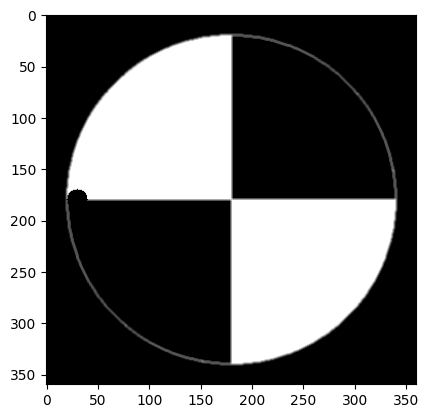

Visualization of separation of non blurred and blurred parts (radius = fr)


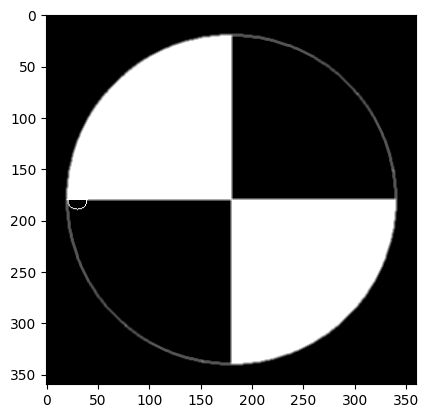

Laplacian Edge Mask


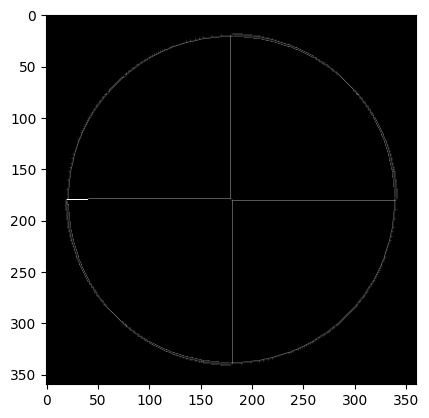

L O G edge mask


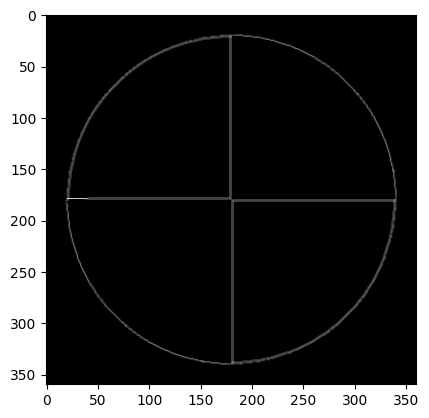

Variance mask : 


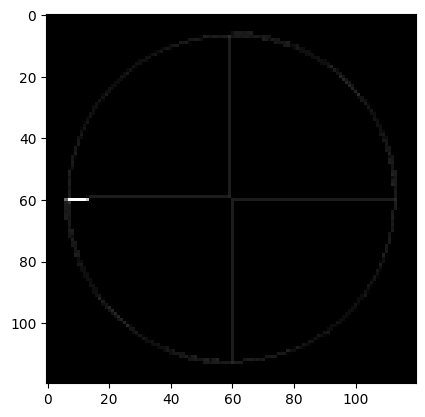

difference in variance maps


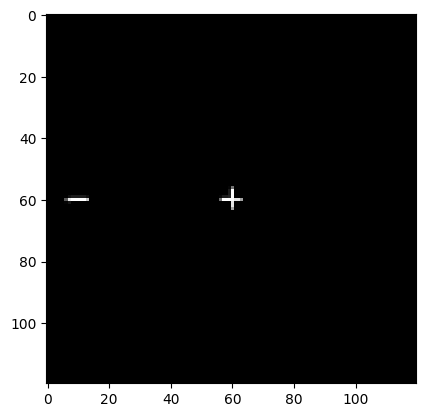

[[[ 7 59]]

 [[ 6 60]]

 [[ 7 61]]

 [[ 8 60]]

 [[13 60]]

 [[13 59]]]
(30, 178)  are the new centers 
predicted center of the new focal length is highlighed in red


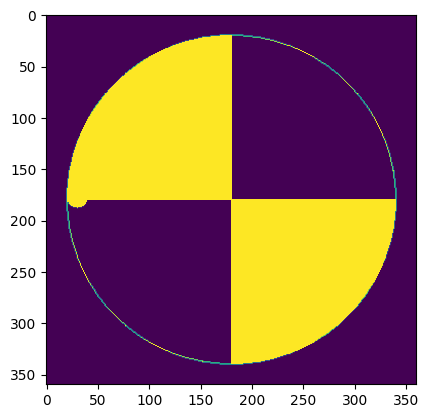

Predicted translation of focal point :  -150 -2
Actual translation :  -150
Correction parameters
Angle of rotation : 
Radius :  211.9363111880548
Angle :  -0.6076335892445521
[[[59 56]]

 [[59 58]]

 [[58 59]]

 [[56 59]]

 [[56 60]]

 [[59 60]]

 [[60 61]]

 [[60 63]]

 [[60 61]]

 [[61 60]]

 [[63 60]]

 [[61 60]]

 [[60 59]]

 [[60 56]]]
(180, 172)  are the new centers 
predicted center of the new focal length is highlighed in red


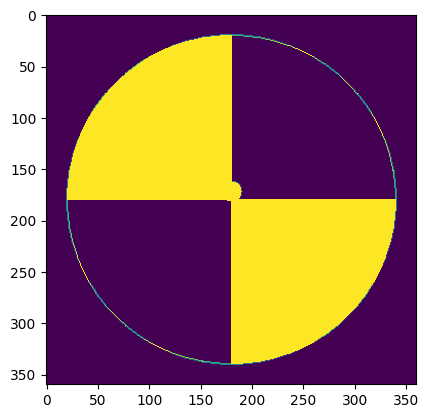

Predicted translation of focal point :  0 -8
Actual translation :  -150
Correction parameters
Angle of rotation : 
Radius :  175.36248173426378
Angle :  -0.7853981633974484
Region with focal radius : 10




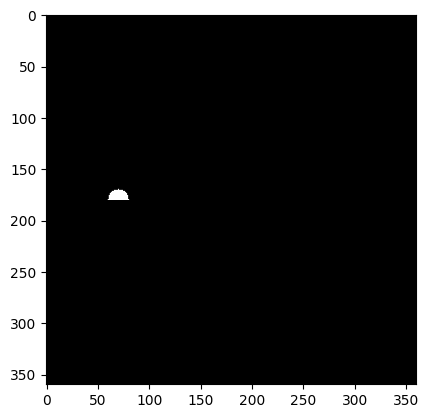

Test image with radius  10  being sharp with rest as blurred


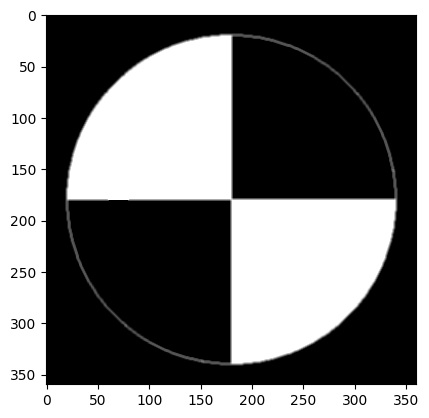

difference in test image and filtered non blurred region (in circular fasion)


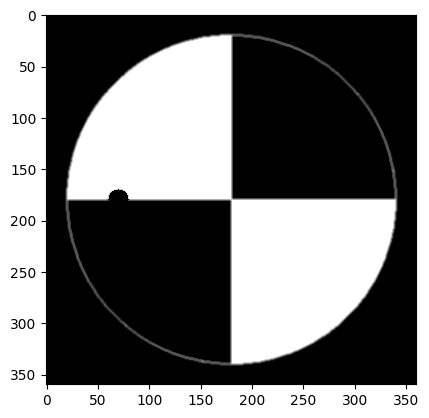

Visualization of separation of non blurred and blurred parts (radius = fr)


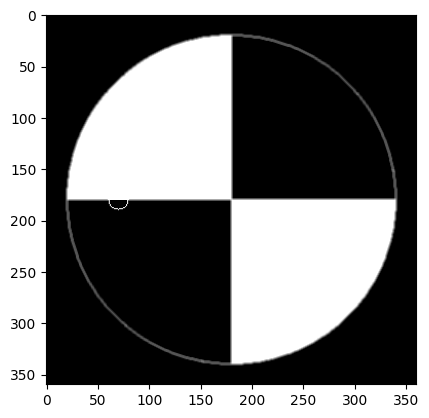

Laplacian Edge Mask


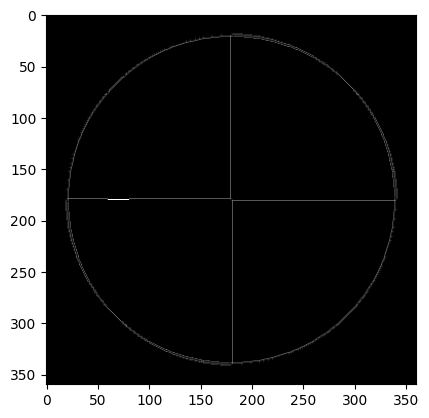

L O G edge mask


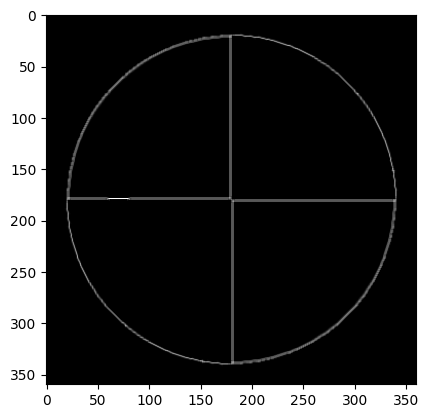

Variance mask : 


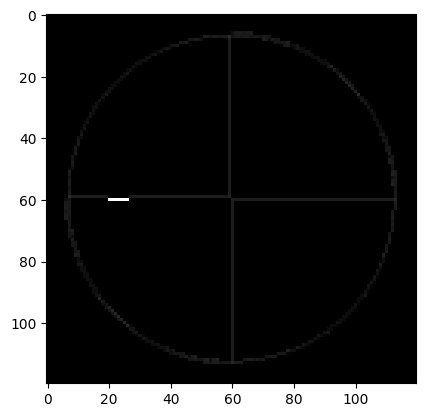

difference in variance maps


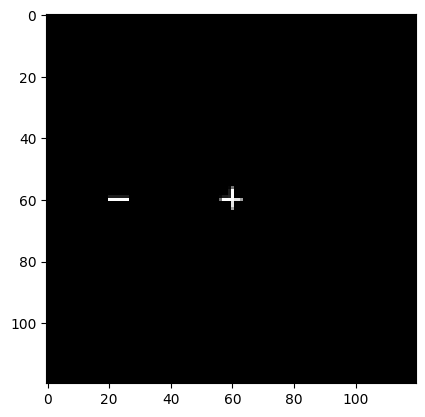

[[[20 59]]

 [[20 60]]

 [[26 60]]

 [[26 59]]]
(70, 178)  are the new centers 
predicted center of the new focal length is highlighed in red


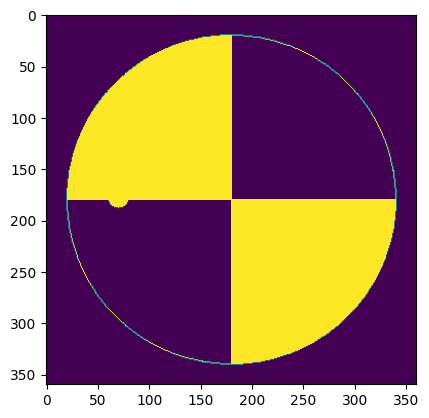

Predicted translation of focal point :  -110 -2
Actual translation :  -110
Correction parameters
Angle of rotation : 
Radius :  200.60159520801423
Angle :  -0.6474891235433295
[[[59 56]]

 [[59 58]]

 [[58 59]]

 [[56 59]]

 [[56 60]]

 [[59 60]]

 [[60 61]]

 [[60 63]]

 [[60 61]]

 [[61 60]]

 [[63 60]]

 [[61 60]]

 [[60 59]]

 [[60 56]]]
(180, 172)  are the new centers 
predicted center of the new focal length is highlighed in red


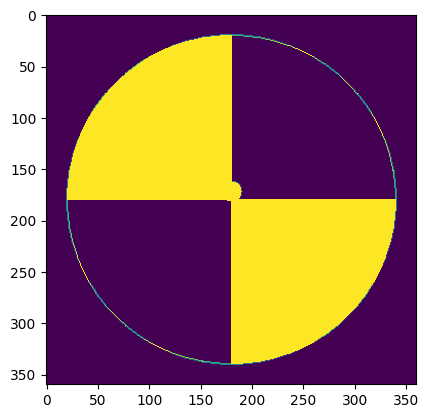

Predicted translation of focal point :  0 -8
Actual translation :  -110
Correction parameters
Angle of rotation : 
Radius :  175.36248173426378
Angle :  -0.7853981633974484
Region with focal radius : 10




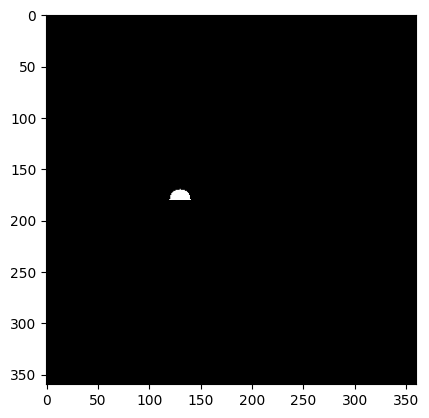

Test image with radius  10  being sharp with rest as blurred


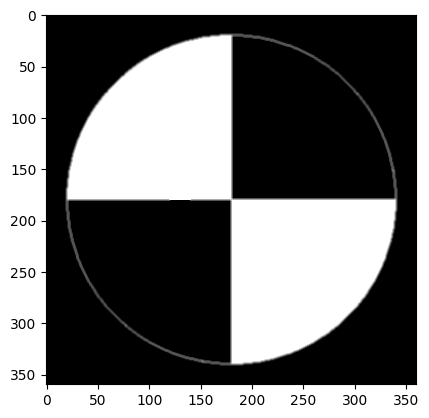

difference in test image and filtered non blurred region (in circular fasion)


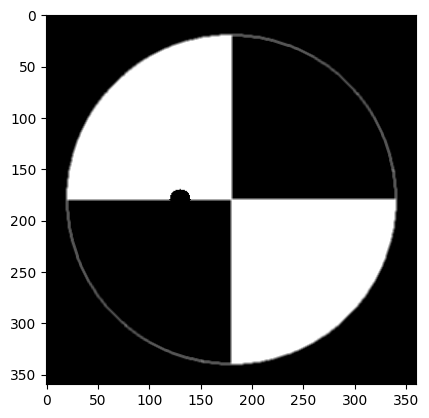

Visualization of separation of non blurred and blurred parts (radius = fr)


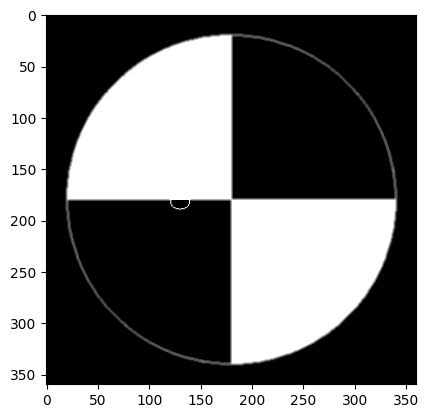

Laplacian Edge Mask


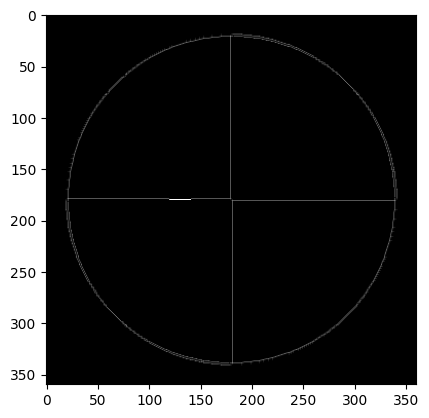

L O G edge mask


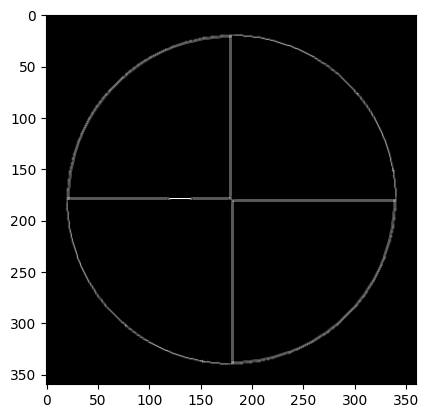

Variance mask : 


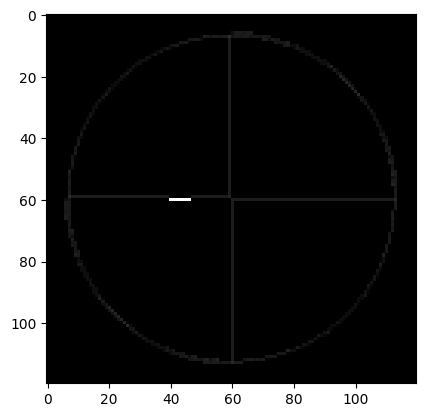

difference in variance maps


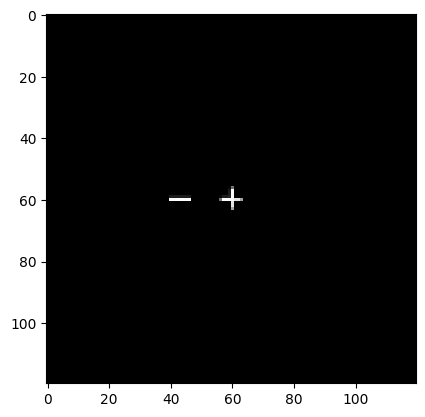

[[[40 59]]

 [[40 60]]

 [[46 60]]

 [[46 59]]]
(130, 178)  are the new centers 
predicted center of the new focal length is highlighed in red


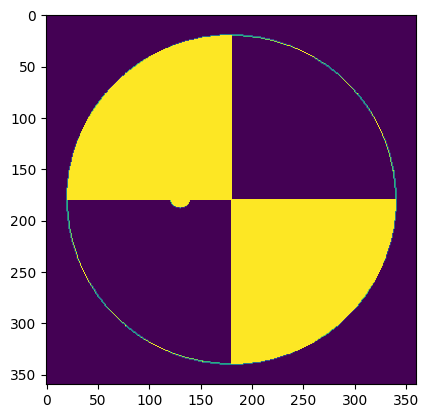

Predicted translation of focal point :  -50 -2
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  185.04323819042943
Angle :  -0.7127294143999312
[[[59 56]]

 [[59 58]]

 [[58 59]]

 [[56 59]]

 [[56 60]]

 [[59 60]]

 [[60 61]]

 [[60 63]]

 [[60 61]]

 [[61 60]]

 [[63 60]]

 [[61 60]]

 [[60 59]]

 [[60 56]]]
(180, 172)  are the new centers 
predicted center of the new focal length is highlighed in red


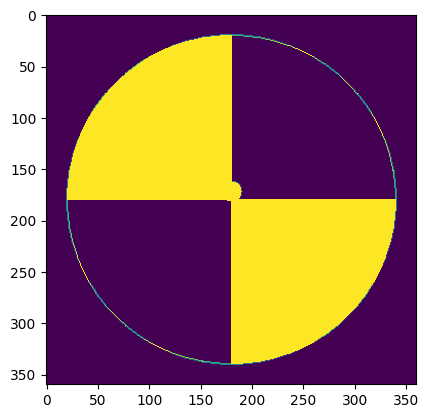

Predicted translation of focal point :  0 -8
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  175.36248173426378
Angle :  -0.7853981633974484
Region with focal radius : 10




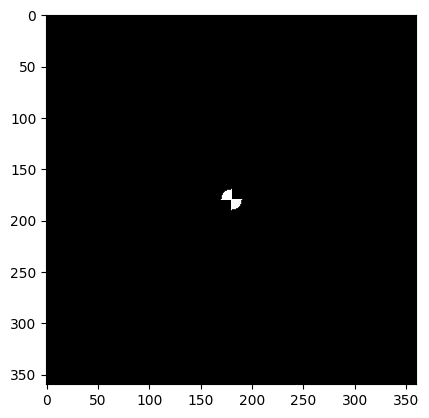

Test image with radius  10  being sharp with rest as blurred


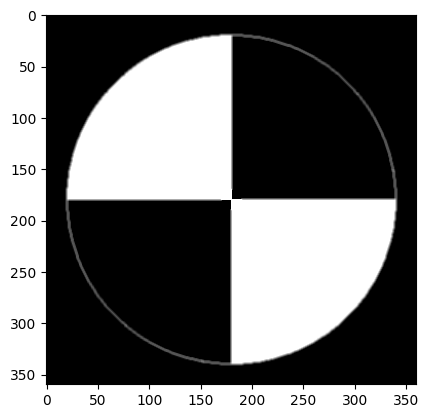

difference in test image and filtered non blurred region (in circular fasion)


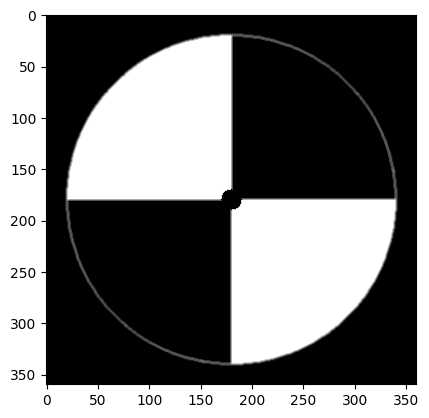

Visualization of separation of non blurred and blurred parts (radius = fr)


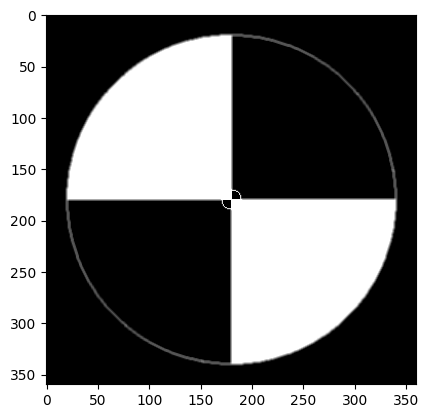

Laplacian Edge Mask


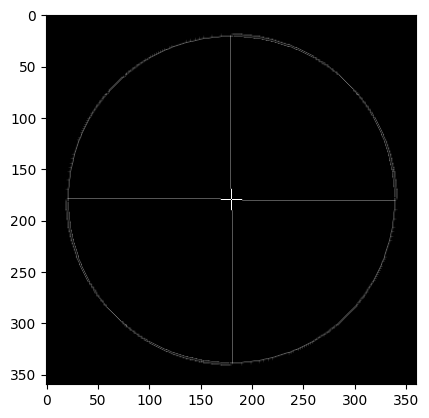

L O G edge mask


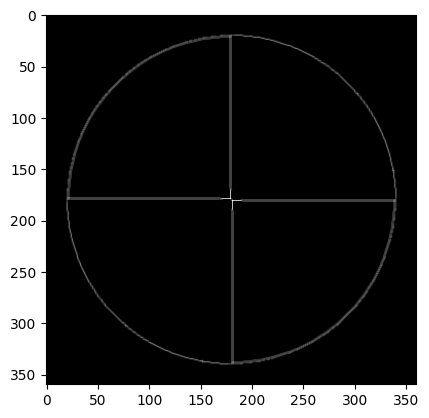

Variance mask : 


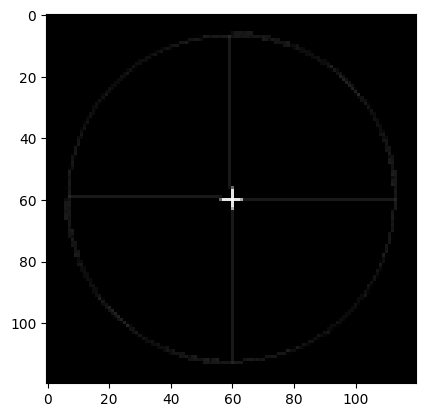

difference in variance maps


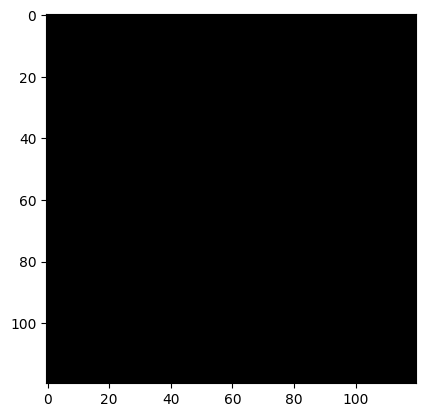

Region with focal radius : 10




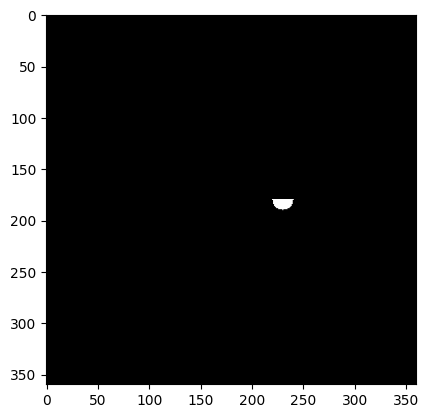

Test image with radius  10  being sharp with rest as blurred


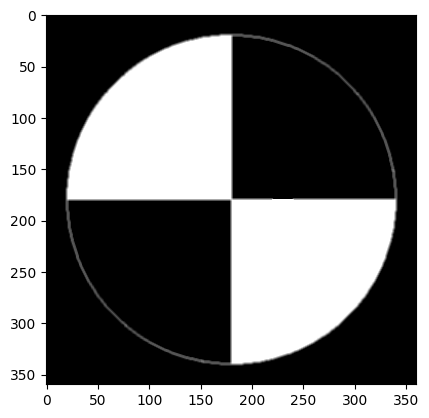

difference in test image and filtered non blurred region (in circular fasion)


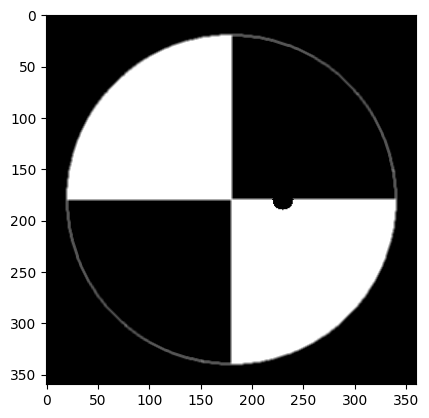

Visualization of separation of non blurred and blurred parts (radius = fr)


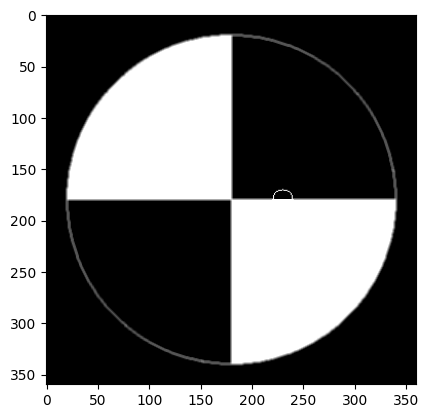

Laplacian Edge Mask


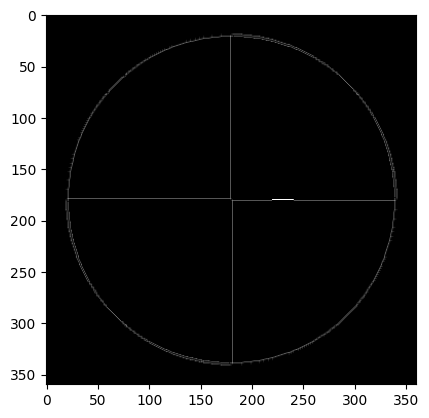

L O G edge mask


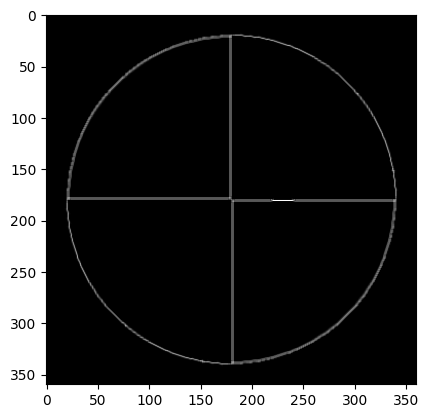

Variance mask : 


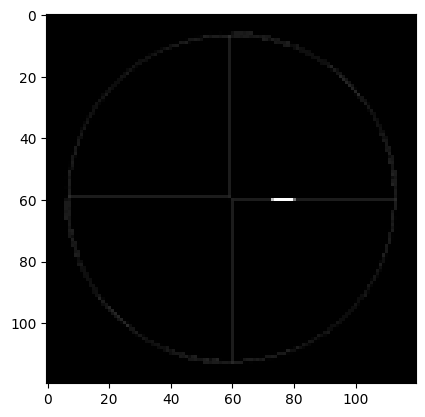

difference in variance maps


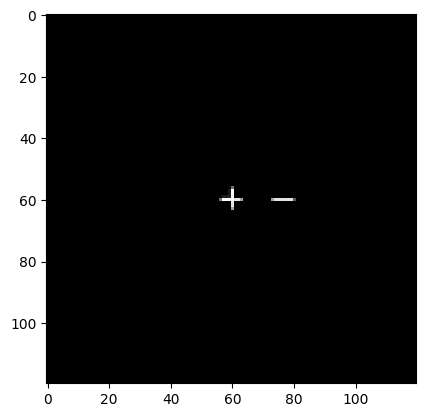

[[[73 60]]

 [[80 60]]]
(231, 180)  are the new centers 
predicted center of the new focal length is highlighed in red


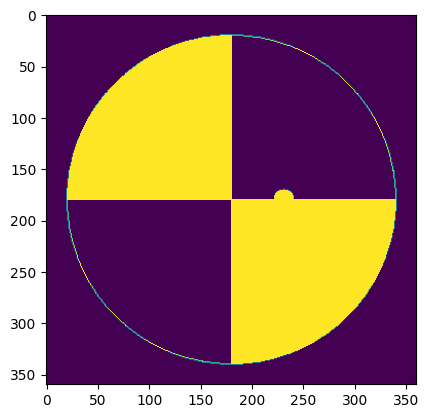

Predicted translation of focal point :  51 0
Actual translation :  50
Correction parameters
Angle of rotation : 
Radius :  160.77624202599088
Angle :  -0.842604400576609
[[[59 56]]

 [[59 58]]

 [[58 59]]

 [[56 59]]

 [[56 60]]

 [[59 60]]

 [[60 61]]

 [[60 63]]

 [[60 61]]

 [[61 60]]

 [[63 60]]

 [[61 60]]

 [[60 59]]

 [[60 56]]]
(180, 172)  are the new centers 
predicted center of the new focal length is highlighed in red


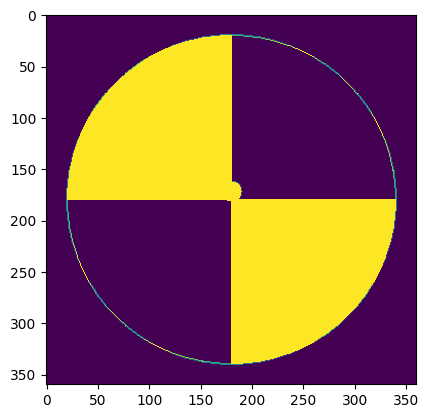

Predicted translation of focal point :  0 -8
Actual translation :  50
Correction parameters
Angle of rotation : 
Radius :  175.36248173426378
Angle :  -0.7853981633974484
Region with focal radius : 10




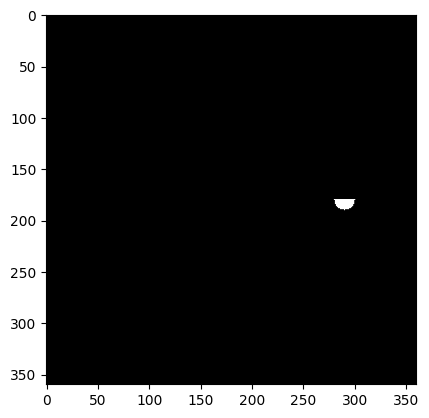

Test image with radius  10  being sharp with rest as blurred


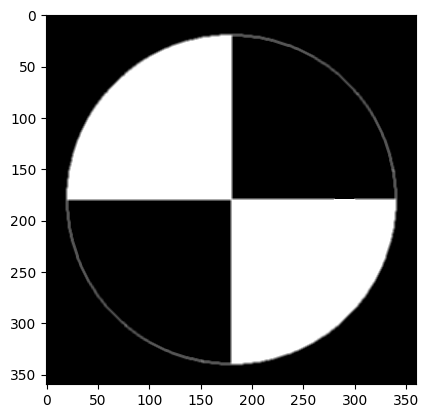

difference in test image and filtered non blurred region (in circular fasion)


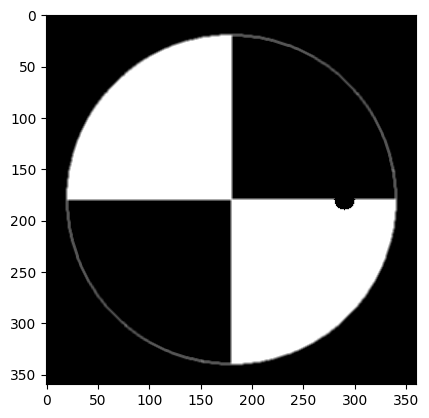

Visualization of separation of non blurred and blurred parts (radius = fr)


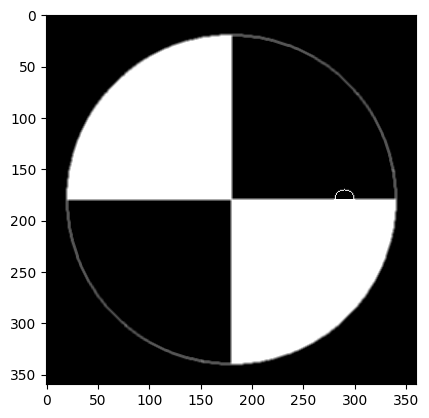

Laplacian Edge Mask


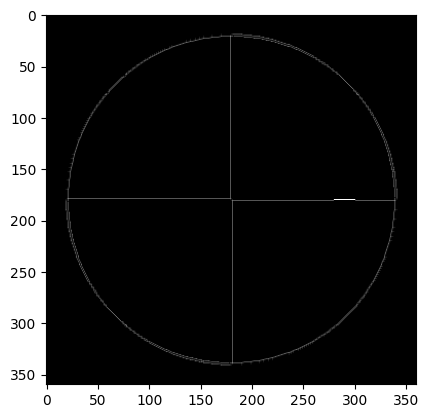

L O G edge mask


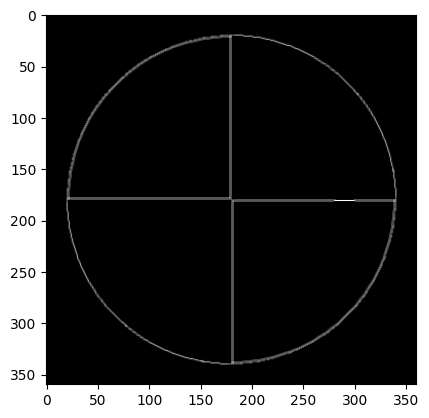

Variance mask : 


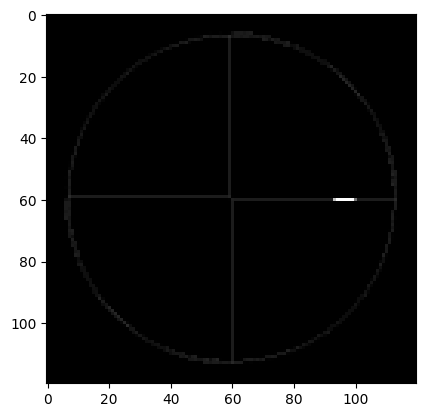

difference in variance maps


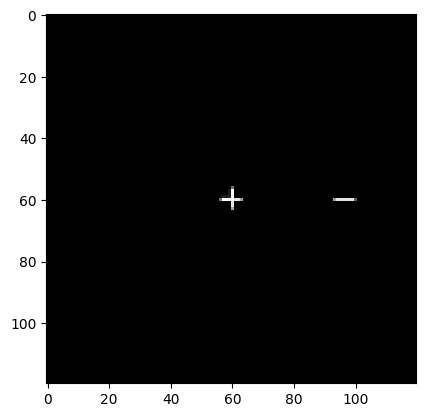

[[[ 93  60]]

 [[100  60]]]
(291, 180)  are the new centers 
predicted center of the new focal length is highlighed in red


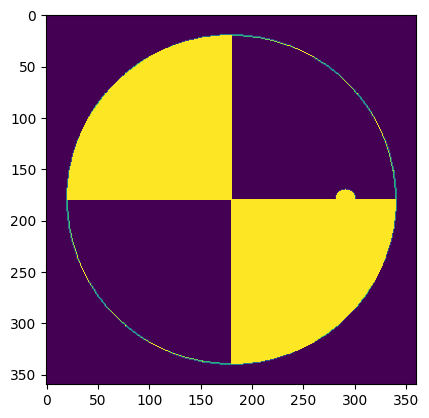

Predicted translation of focal point :  111 0
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  148.2194319244275
Angle :  -0.943488134519134
[[[59 56]]

 [[59 58]]

 [[58 59]]

 [[56 59]]

 [[56 60]]

 [[59 60]]

 [[60 61]]

 [[60 63]]

 [[60 61]]

 [[61 60]]

 [[63 60]]

 [[61 60]]

 [[60 59]]

 [[60 56]]]
(180, 172)  are the new centers 
predicted center of the new focal length is highlighed in red


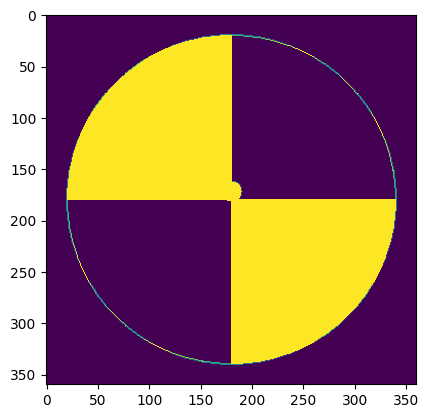

Predicted translation of focal point :  0 -8
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  175.36248173426378
Angle :  -0.7853981633974484
Region with focal radius : 10




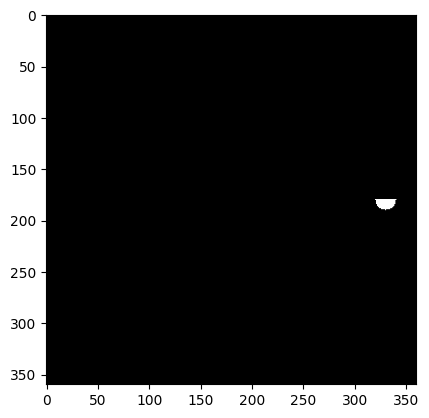

Test image with radius  10  being sharp with rest as blurred


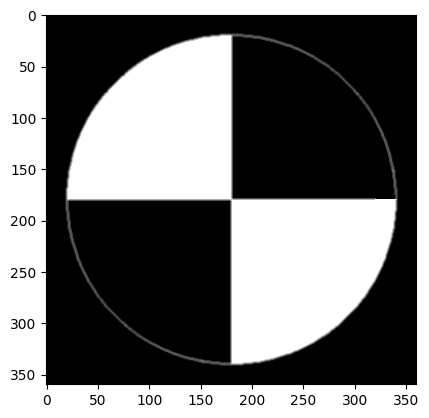

difference in test image and filtered non blurred region (in circular fasion)


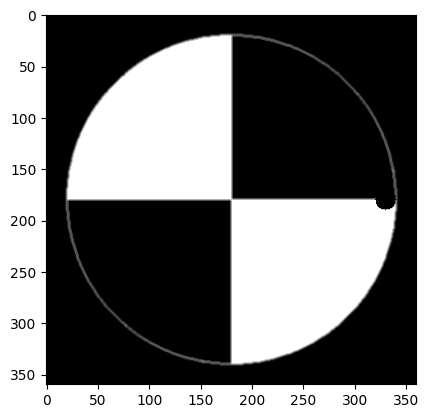

Visualization of separation of non blurred and blurred parts (radius = fr)


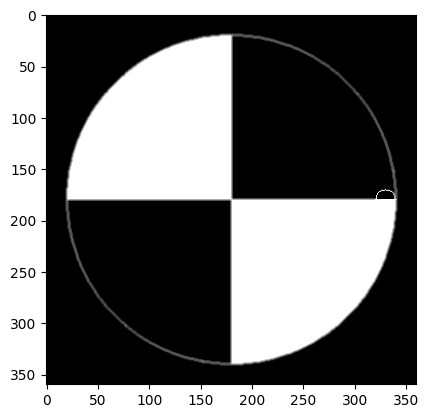

Laplacian Edge Mask


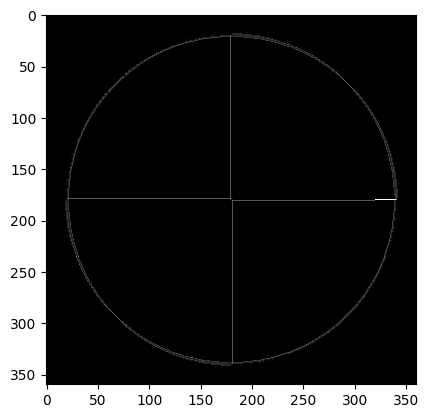

L O G edge mask


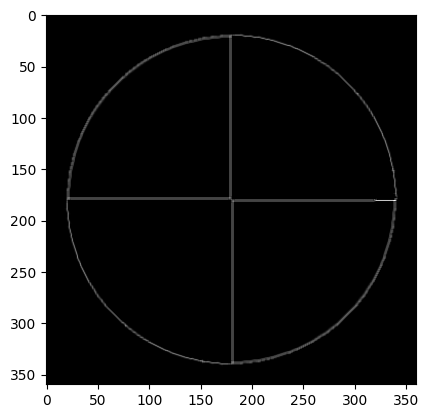

Variance mask : 


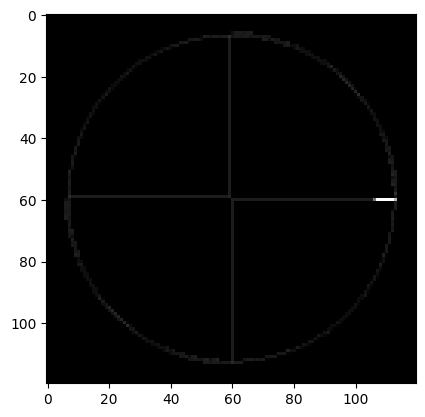

difference in variance maps


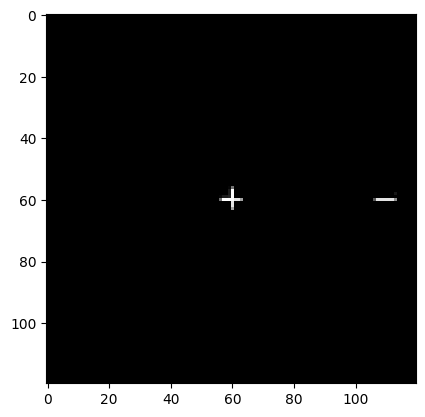

[[[106  60]]

 [[113  60]]]
(330, 180)  are the new centers 
predicted center of the new focal length is highlighed in red


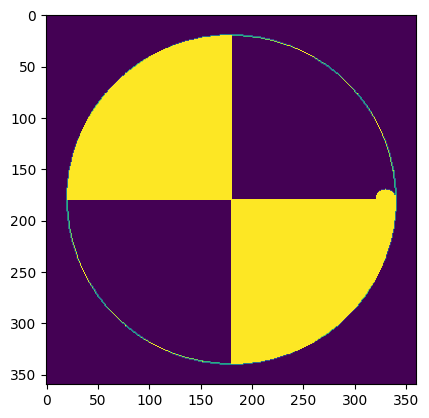

Predicted translation of focal point :  150 0
Actual translation :  150
Correction parameters
Angle of rotation : 
Radius :  140.98226838861686
Angle :  -1.0182119765041828
[[[113  58]]]
(340, 174)  are the new centers 
predicted center of the new focal length is highlighed in red


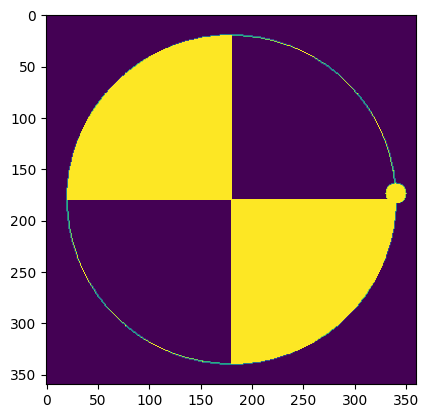

Predicted translation of focal point :  160 -6
Actual translation :  150
Correction parameters
Angle of rotation : 
Radius :  139.18692467326088
Angle :  -1.0685826404927201
[[[59 56]]

 [[59 58]]

 [[58 59]]

 [[56 59]]

 [[56 60]]

 [[59 60]]

 [[60 61]]

 [[60 63]]

 [[60 61]]

 [[61 60]]

 [[63 60]]

 [[61 60]]

 [[60 59]]

 [[60 56]]]
(180, 172)  are the new centers 
predicted center of the new focal length is highlighed in red


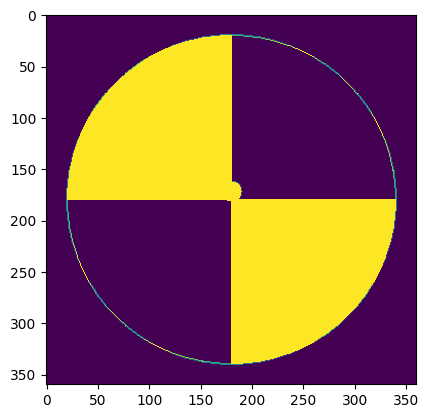

Predicted translation of focal point :  0 -8
Actual translation :  150
Correction parameters
Angle of rotation : 
Radius :  175.36248173426378
Angle :  -0.7853981633974484
------------------------------------------------------














In [5]:
focal_radiis = 10
translations = [-150,-110,-50,0,50,110,150]
for t  in translations:
    center = (CENTER[0]+t,CENTER[1])

    fr = 10
    mask = np.zeros(IMG_DIMS, dtype=np.uint8)
    non_blurred_region = cv2.circle(mask, center, 10, (255, 255, 255), -1)
    non_blurred_region = cv2.bitwise_and(non_blurred_region, original_image)
    print('Region with focal radius : ' + str(fr) + '\n\n')
    plt.imshow(non_blurred_region, cmap='gray')
    plt.show()

    blurred_image_copy = blurred_image.copy()
    blurred_image_copy = cv2.circle(blurred_image_copy, center, fr, (0, 0, 0), -1)
    test_image = blurred_image_copy +  non_blurred_region
            
    print('Test image with radius ', fr, ' being sharp with rest as blurred')
    plt.imshow(test_image, cmap='gray')
    plt.show()
    print('difference in test image and filtered non blurred region (in circular fasion)')
    plt.imshow(test_image - non_blurred_region, cmap='gray')
    plt.show()
    print('Visualization of separation of non blurred and blurred parts (radius = fr)')
    test_image_copy = test_image.copy()
    plt.imshow(cv2.circle(test_image_copy, center, fr, (255, 0, 0), 1), cmap='gray')
    plt.show()

    laplacian_filter_8 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    edge_mask = cv2.filter2D(test_image, -1, laplacian_filter_8)
    
    print('Laplacian Edge Mask')
    plt.imshow(edge_mask, cmap='gray')
    plt.show()
    gaussian_image = cv2.GaussianBlur(test_image, (3, 3), 3)
    g_edge_mask = cv2.filter2D(gaussian_image, -1, laplacian_filter_8)
    print('L O G edge mask')
    plt.imshow(g_edge_mask, cmap='gray')
    plt.show()

    edge_map = g_edge_mask

    test_image_variances = []
    for x in range(0, IMG_DIMS[0]//3):
        for y in range(0, IMG_DIMS[1]//3):
            i = x * 3
            j = y * 3
            test_image_variances.append(np.var([edge_mask[i+0,j+0], edge_mask[i+0,j+1],edge_mask[i+0,j+2],edge_mask[i+1,j+0],edge_mask[i+1,j+1],
            edge_mask[i+1,j+2]
            ,edge_mask[i+2,j+0],edge_mask[i+2,j+1],edge_mask[i+2,j+2]]))

    test_image_variances = np.array(test_image_variances).reshape(IMG_DIMS[0]//3, IMG_DIMS[1]//3)

    print('Variance mask : ')
    plt.imshow(test_image_variances, cmap='gray')
    plt.show()

    print('difference in variance maps')
    plt.imshow((abs(test_image_variances - variance_image)), cmap='gray')
    plt.show()


    # find contours
    absolute_diff_variance_map = abs(test_image_variances - variance_image)
    countours, b  = cv2.findContours(cv2.threshold(absolute_diff_variance_map, 255, 255, cv2.THRESH_BINARY)[1].astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for c in countours:
        print(c)
        # Find the center of all contours.
        #M = cv2.moments(c)
        #if (M["m00"] == 0):
        #     continue 
        #cX = int(M["m10"] / M["m00"])
        #cY = int(M["m01"] / M["m00"])

        x,y,w,h = cv2.boundingRect(c)

        
        focal_point_position = ((int)((x  + w/2) * 3), (int)((y + h/6) * 3)) 
        print(focal_point_position, ' are the new centers ')

        img = original_image.copy()

        print('predicted center of the new focal length is highlighed in red')
        plt.imshow(cv2.circle(img, focal_point_position, 10, (255, 0, 0), -1))
        plt.show()

        print('Predicted translation of focal point : ', focal_point_position[0] -  CENTER[0], focal_point_position[1] - CENTER[1])
        print('Actual translation : ', t)
        #print(variances)

        print("Correction parameters")

        print('Angle of rotation : ')
        _x = x - CENTER[0]
        _y = y - CENTER[1]
        r = np.sqrt(_x*_x + _y*_y)
        print('Radius : ', r)
        sin_theta = (_y) / r
        angle = np.arcsin(sin_theta)
        print('Angle : ', angle)



print('------------------------------------------------------\n\n\n\n\n\n\n\n\n\n\n\n')

#print(original_variances)